Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### How can you help here?
Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Jamboree_Admission.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no null values in the dataframe

In [7]:
## Copy of the dataset for further usage
df_copy = df.copy(deep = True)

Taking a copy of df for future evaluations

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
## There is space at the end of the column name so renaming it.
df.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'},inplace = True) 

In [10]:
df_copy = df.copy(deep = True)

In [11]:
## removin the first column as it has no significance just an index
df.drop(['Serial No.'],axis=1,inplace=True)

In [12]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


### Univariate Analysis

In [13]:
cat_cols = []
for i in df.columns:
    if df[i].nunique() < 10:
        cat_cols.append(i)
        print(i + ':' + str(df[i].nunique()))    

University Rating:5
SOP:9
LOR:9
Research:2


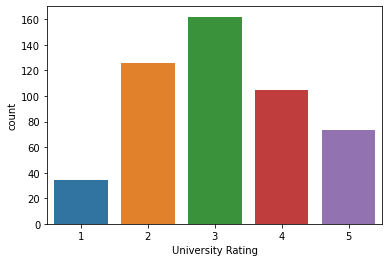

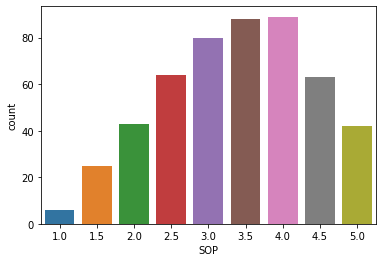

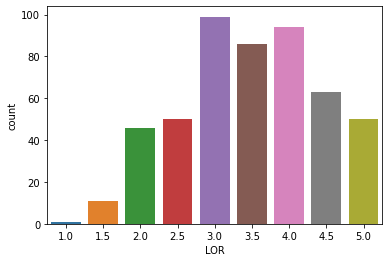

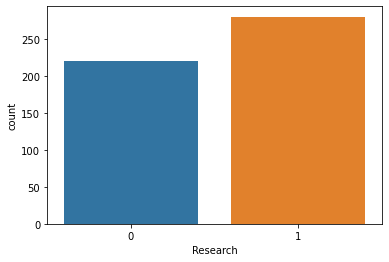

In [14]:
for i in range(len(cat_cols)):
    sns.countplot(df[cat_cols[i]])
    plt.show()

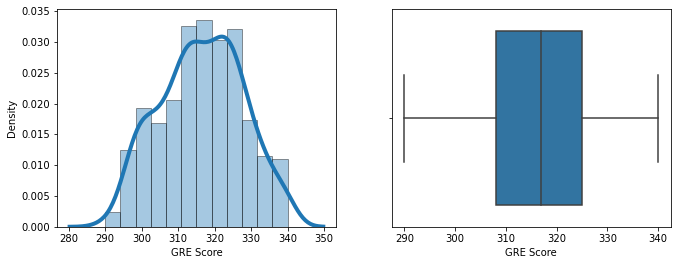

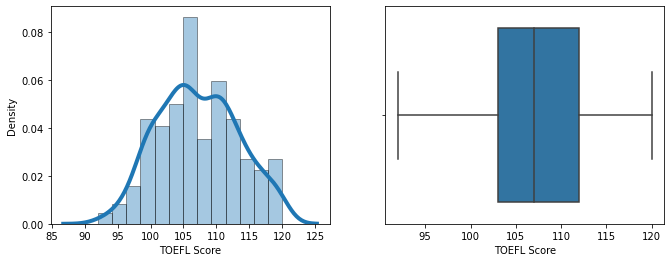

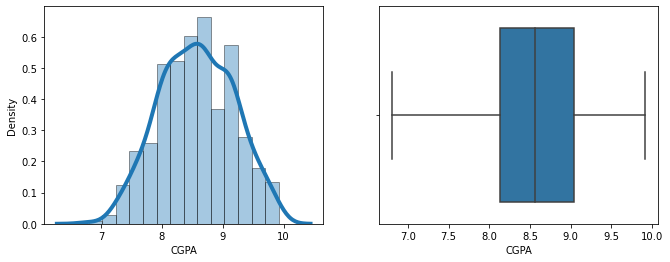

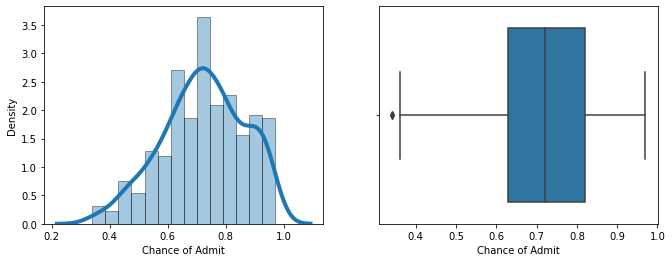

In [15]:
con_cols = []
for i in df.columns:
    if df[i].nunique() > 10:
        con_cols.append(i)
        plt.figure(figsize=(11,4))
        plt.subplot(1,2,1)
        sns.distplot(df[i],hist=True,kde=True,hist_kws={'edgecolor':'black'},kde_kws ={"linewidth":4})
        plt.subplot(1,2,2)
        sns.boxplot(df[i])
        plt.show()

### BiVariate Analysis

<AxesSubplot:xlabel='University Rating', ylabel='count'>

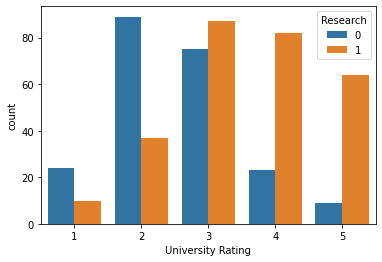

In [16]:
sns.countplot(x=df['University Rating'],hue =df['Research'])

<AxesSubplot:xlabel='Research', ylabel='TOEFL Score'>

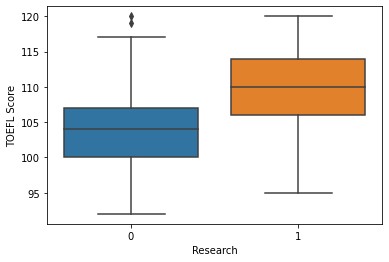

In [17]:
sns.boxplot(y=df['TOEFL Score'],x=df['Research'])

<AxesSubplot:xlabel='Research', ylabel='CGPA'>

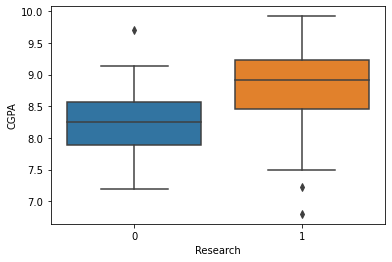

In [18]:
sns.boxplot(y=df['CGPA'],x=df['Research'])

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

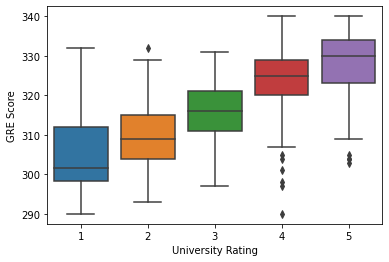

In [19]:
sns.boxplot(x=df['University Rating'],y=df['GRE Score'])

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

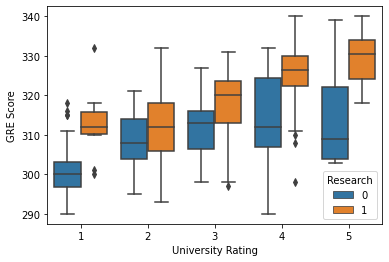

In [20]:
sns.boxplot(x=df['University Rating'],y=df['GRE Score'],hue = df['Research'])

<AxesSubplot:xlabel='LOR', ylabel='GRE Score'>

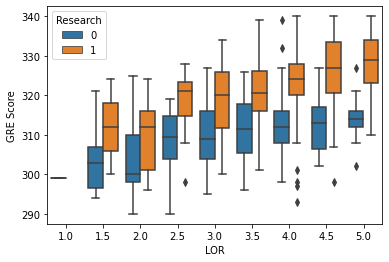

In [21]:
sns.boxplot(x=df['LOR'],y=df['GRE Score'],hue = df['Research'])

<AxesSubplot:xlabel='SOP', ylabel='GRE Score'>

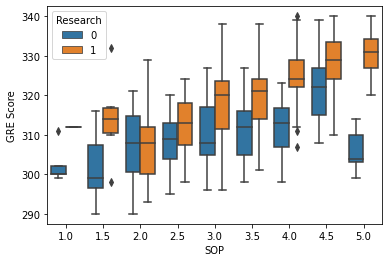

In [22]:
sns.boxplot(x=df['SOP'],y=df['GRE Score'],hue = df['Research'])

In [23]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

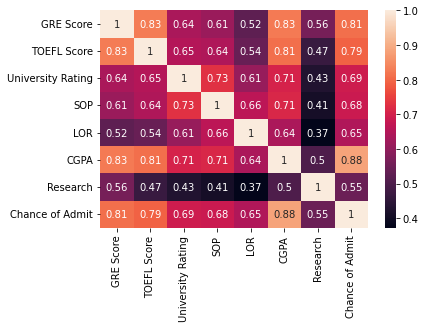

In [24]:
sns.heatmap(df.corr(), annot = True)

### Linear Regression

In [25]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [26]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
## Target Feature
predict = df['Chance of Admit']

In [28]:
## dropping target column from dataframe
df.drop(['Chance of Admit'],axis=1,inplace=True)

In [29]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [30]:
# Normalisation
df.columns
for i in df.columns:
    df[i] = minmax_scale(df[i])
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


In [31]:
predict = pd.DataFrame(predict,columns=['Chance of Admit'])

In [32]:
#Normalisation of target feature
predict['Chance of Admit'] = minmax_scale(predict['Chance of Admit'])

In [33]:
predict.head()

,Chance of Admit
0,0.920635
1,0.666667
2,0.603175
3,0.730159
4,0.492063


In [34]:
#Train and Test data split
x_train,x_test,y_train,y_test = train_test_split(df,predict,train_size=0.30,random_state=1)

In [35]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
409,0.20,0.214286,0.00,0.250,0.375,0.391026,0.0
103,0.54,0.428571,0.25,0.875,0.750,0.535256,0.0
220,0.46,0.392857,0.50,0.750,0.750,0.625000,0.0
130,0.98,0.785714,1.00,0.750,0.875,0.948718,1.0
353,0.20,0.357143,0.50,0.625,0.375,0.439103,0.0


In [36]:
lr_1 = LinearRegression()

In [37]:
lr_1.fit(x_train,y_train)

LinearRegression()

In [38]:
y_predict = lr_1.predict(x_test)

In [39]:
lr_1.intercept_

array([0.06052024])

In [40]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr_1.coef_[0][idx]))

The coefficient for GRE Score is -0.0050978648509186104
The coefficient for TOEFL Score is 0.21669717001842637
The coefficient for University Rating is 0.05851981351758148
The coefficient for SOP is 0.03264096702009038
The coefficient for LOR is 0.03798672416464777
The coefficient for CGPA is 0.591252249663798
The coefficient for Research is 0.05080772261800126


In [41]:
intercept = lr_1.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.060520238439629614


### Ridge

In [42]:
ridge = Ridge() # initializing the model

In [43]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,5.0]} ## Parameters for alpha to select the best parameter

In [44]:
folds = 5 #total number of crossvaldations to be done during the model building

In [45]:
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

In [46]:
model_cv.fit(x_train, y_train) # fit the model

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_) # to get the output of the model
cv_results = cv_results[cv_results['param_alpha']<=200] 
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007201,0.001834,0.004627,0.001250,0.0001,{'alpha': 0.0001},-0.091895,-0.073503,-0.075164,-0.063529,...,-0.073154,0.010767,12,-0.060991,-0.068404,-0.066560,-0.069797,-0.069792,-0.067109,0.003281
1,0.007750,0.005073,0.003419,0.003326,0.001,{'alpha': 0.001},-0.091907,-0.073476,-0.075160,-0.063514,...,-0.073147,0.010775,11,-0.060993,-0.068400,-0.066558,-0.069794,-0.069790,-0.067107,0.003279
2,0.000000,0.000000,0.006252,0.007658,0.01,{'alpha': 0.01},-0.092031,-0.073211,-0.075122,-0.063371,...,-0.073078,0.010845,10,-0.061018,-0.068365,-0.066541,-0.069764,-0.069762,-0.067090,0.003259
3,0.003126,0.006252,0.003125,0.006250,0.05,{'alpha': 0.05},-0.092555,-0.072098,-0.074962,-0.062793,...,-0.072796,0.011151,8,-0.061149,-0.068228,-0.066492,-0.069677,-0.069725,-0.067054,0.003181
4,0.007425,0.005962,0.004122,0.002295,0.1,{'alpha': 0.1},-0.093160,-0.070839,-0.074785,-0.062194,...,-0.072490,0.011513,5,-0.061304,-0.068114,-0.066477,-0.069627,-0.069765,-0.067057,0.003114


In [48]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

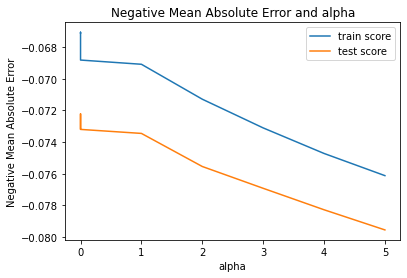

In [49]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [50]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
ridge.coef_

array([[0.10754325, 0.20096854, 0.06723524, 0.06535809, 0.0690688 ,
        0.3543325 , 0.0545913 ]])

### Lasso

In [51]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [52]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004125,0.006066,0.007277,0.007109,0.0001,{'alpha': 0.0001},-0.092157,-0.072387,-0.075086,-0.062701,...,-0.072802,0.011007,2,-0.061005,-0.068378,-0.066512,-0.069583,-0.069793,-0.067054,0.003242
1,0.006106,0.005892,0.001620,0.001984,0.001,{'alpha': 0.001},-0.094912,-0.069379,-0.074558,-0.061633,...,-0.072382,0.012303,1,-0.061230,-0.068353,-0.066334,-0.069349,-0.070202,-0.067094,0.003203
2,0.006251,0.007655,0.003125,0.006251,0.01,{'alpha': 0.01},-0.130676,-0.067532,-0.077235,-0.085489,...,-0.087199,0.022479,3,-0.077155,-0.084240,-0.078556,-0.082372,-0.084308,-0.081326,0.002951
3,0.011153,0.008083,0.003000,0.002683,0.05,{'alpha': 0.05},-0.233757,-0.139550,-0.121535,-0.175351,...,-0.165280,0.038596,4,-0.149312,-0.167640,-0.169887,-0.161156,-0.161276,-0.161854,0.007157
4,0.004725,0.005737,0.001600,0.002059,0.1,{'alpha': 0.1},-0.233757,-0.141111,-0.126631,-0.177196,...,-0.167972,0.037120,5,-0.149312,-0.171795,-0.175198,-0.162639,-0.167072,-0.165203,0.009010


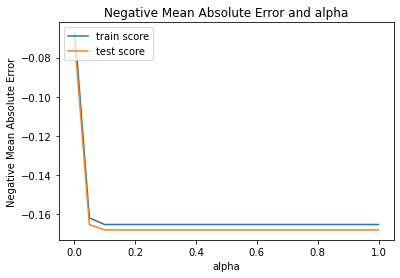

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
alpha = 0.1
lasso = Lasso(alpha=alpha)

ridge.fit(x_train, y_train)
ridge.coef_

array([[0.10754325, 0.20096854, 0.06723524, 0.06535809, 0.0690688 ,
        0.3543325 , 0.0545913 ]])

### OLS Regression

In [56]:
xtrain_ols1 = sm.add_constant(x_train) ## adding constant to perform OLS regression
ols_regression1 = sm.OLS(y_train,xtrain_ols1).fit() ## fitting model

In [57]:
print(ols_regression1.summary()) ## Summary of the OLS Model

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     78.89
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           9.01e-46
Time:                        17:10:19   Log-Likelihood:                 142.34
No. Observations:                 150   AIC:                            -268.7
Df Residuals:                     142   BIC:                            -244.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0605      0.02

In [58]:
## VIF of the features present in the model

xtrain_vif1 = x_train
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain_vif1.values, i) for i in range(xtrain_vif1.shape[1])]
vif_data['VIF'] = round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = 'VIF',ascending=False)
vif_data

,feature,VIF
5,CGPA,44.80
0,GRE Score,32.49
1,TOEFL Score,29.84
3,SOP,20.12
4,LOR,16.23
2,University Rating,12.23
6,Research,3.14


In [59]:
## Removing the columns in the dataset

xtrain_ols2 = xtrain_ols1.drop('GRE Score',1)
xtrain_vif2 = xtrain_vif1.drop('GRE Score',1)

xtrain_ols2 = sm.add_constant(xtrain_ols2)
ols_regression2 = sm.OLS(y_train,xtrain_ols2).fit()

In [60]:
print(ols_regression2.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     92.68
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           8.97e-47
Time:                        17:10:19   Log-Likelihood:                 142.33
No. Observations:                 150   AIC:                            -270.7
Df Residuals:                     143   BIC:                            -249.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0606      0.02

In [61]:
vif_data2 = pd.DataFrame()
vif_data2["feature"] = xtrain_vif2.columns
vif_data2["VIF"] = [variance_inflation_factor(xtrain_vif2.values, i) for i in range(xtrain_vif2.shape[1])]
vif_data2['VIF'] = round(vif_data2['VIF'],2)
vif_data2 = vif_data2.sort_values(by = 'VIF',ascending=False)
vif_data2

,feature,VIF
4,CGPA,34.99
0,TOEFL Score,22.07
2,SOP,19.63
3,LOR,15.66
1,University Rating,11.68
5,Research,2.87


In [62]:
xtrain_ols3 = xtrain_ols2.drop('SOP',1)
xtrain_vif3 = xtrain_vif2.drop('SOP',1)

xtrain_ols3 = sm.add_constant(xtrain_ols3)
ols_regression3 = sm.OLS(y_train,xtrain_ols3).fit()

In [63]:
print(ols_regression3.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           9.72e-48
Time:                        17:10:20   Log-Likelihood:                 142.13
No. Observations:                 150   AIC:                            -272.3
Df Residuals:                     144   BIC:                            -254.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0633      0.02

In [64]:
vif_data3 = pd.DataFrame()
vif_data3["feature"] = xtrain_vif3.columns
vif_data3["VIF"] = [variance_inflation_factor(xtrain_vif3.values, i) for i in range(xtrain_vif3.shape[1])]
vif_data3['VIF'] = round(vif_data3['VIF'],2)
vif_data3 = vif_data3.sort_values(by = 'VIF',ascending=False)
vif_data3

,feature,VIF
3,CGPA,33.10
0,TOEFL Score,22.02
2,LOR,14.05
1,University Rating,9.32
4,Research,2.87


In [65]:
xtrain_ols4 = xtrain_ols3.drop('LOR',1)
xtrain_vif4 = xtrain_vif3.drop('LOR',1)

xtrain_ols4 = sm.add_constant(xtrain_ols4)
ols_regression4 = sm.OLS(y_train,xtrain_ols4).fit()

In [66]:
print(ols_regression4.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     139.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.28e-48
Time:                        17:10:20   Log-Likelihood:                 141.61
No. Observations:                 150   AIC:                            -273.2
Df Residuals:                     145   BIC:                            -258.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0730      0.02

In [67]:
vif_data4 = pd.DataFrame()
vif_data4["feature"] = xtrain_vif4.columns
vif_data4["VIF"] = [variance_inflation_factor(xtrain_vif4.values, i) for i in range(xtrain_vif4.shape[1])]
vif_data4['VIF'] = round(vif_data4['VIF'],2)
vif_data4 = vif_data4.sort_values(by = 'VIF',ascending=False)
vif_data4

,feature,VIF
2,CGPA,25.51
0,TOEFL Score,22.01
1,University Rating,8.16
3,Research,2.86


In [68]:
ytrain_predict = ols_regression4.predict(xtrain_ols4)

In [69]:
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,0.46,0.500000,0.25,0.375,0.250,0.522436,0.0
340,0.44,0.535714,0.50,0.500,0.500,0.532051,1.0
47,0.98,0.964286,1.00,0.875,0.750,0.929487,0.0
67,0.52,0.535714,0.25,0.625,0.625,0.589744,1.0
479,0.70,0.642857,0.75,0.875,0.750,0.692308,1.0


In [70]:
xtrain_ols4.columns

Index(['const', 'TOEFL Score', 'University Rating', 'CGPA', 'Research'], dtype='object')

In [71]:
x_test = x_test[['TOEFL Score', 'University Rating', 'CGPA', 'Research']]

In [72]:
x_test.head()

,TOEFL Score,University Rating,CGPA,Research
304,0.500000,0.25,0.522436,0.0
340,0.535714,0.50,0.532051,1.0
47,0.964286,1.00,0.929487,0.0
67,0.535714,0.25,0.589744,1.0
479,0.642857,0.75,0.692308,1.0


In [73]:
x_test = sm.add_constant(x_test)

In [74]:
x_test.head()

,const,TOEFL Score,University Rating,CGPA,Research
304,1.0,0.500000,0.25,0.522436,0.0
340,1.0,0.535714,0.50,0.532051,1.0
47,1.0,0.964286,1.00,0.929487,0.0
67,1.0,0.535714,0.25,0.589744,1.0
479,1.0,0.642857,0.75,0.692308,1.0


In [75]:
ytest_predict = ols_regression4.predict(x_test)

### Linearity Check

In [76]:
df_copy.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

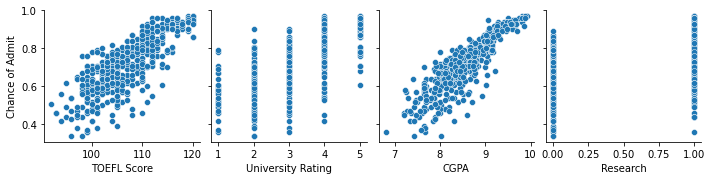

In [77]:
sns.pairplot(df_copy, x_vars=['TOEFL Score', 'University Rating', 'CGPA', 'Research'],y_vars=['Chance of Admit'])

### Mean of residuals

In [78]:
ytest_predict = pd.DataFrame(ytest_predict,columns = ['Chance of Admit'])

In [79]:
np.mean(ytest_predict-y_test)

Chance of Admit    0.012823
dtype: float64

### Test for Homoscedasticity

In [80]:
ytest_predict = pd.DataFrame(ytest_predict,columns=['Chance of Admit'])

In [81]:
ytest_predict.head()

,Chance of Admit
304,0.524003
340,0.610173
47,0.940345
67,0.623686
479,0.753918


In [82]:
y_test.head()

,Chance of Admit
304,0.444444
340,0.650794
47,0.873016
67,0.365079
479,0.714286


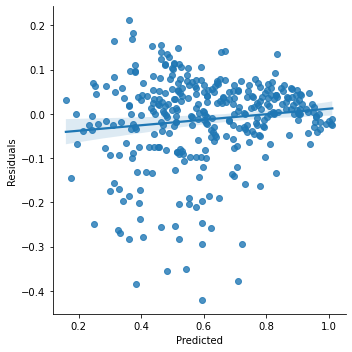

In [83]:
data = pd.DataFrame()
data['Predicted'] = ytest_predict
data['Residuals'] = y_test - ytest_predict
sns.lmplot(x='Predicted',y='Residuals',data=data)

### Normality of residuals

<AxesSubplot:ylabel='Density'>

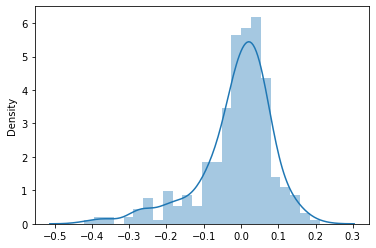

In [84]:
sns.distplot(y_test-ytest_predict)

### Model Evaluation

In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,ytest_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,ytest_predict))   
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,ytest_predict)))

Mean Absolute Error: 0.06971171640623312
Mean Squared Error: 0.010046336251067323
Root Mean Squared Error: 0.10023141349430988


In [86]:
## R2 Score
r2 = r2_score(y_test,ytest_predict)
r2

0.80978591888805

In [87]:
## Adjusted R2 Score
m = y_test.shape[0]
d = xtrain_vif4.shape[1]
adj_r2 = 1-((1-r2)*(m-1)/(m-d-1))
adj_r2

0.8075805382374766

### Actionable Insights & Recommendations